# **Customer Segmentation — Income & Spending Analysis**

**Problem Statement:**

Many retail businesses struggle to understand the diverse spending behaviors of their customers, which leads to ineffective marketing and poorly targeted offers. This project focuses on segmenting customers based on their income levels and spending patterns. By identifying meaningful customer groups, businesses can personalize offers, improve customer engagement, and increase overall sales performance.

##**Exploratory Data Analysis(EDA):**

In [99]:
# Importing the modules for working with dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Uploading the dataset.
df = pd.read_csv('Mall_Customers.csv')

In [101]:
# Checking Top 10 rows for analyse the dataset.
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Observation:**

The dataset consists of customer demographic and behavioral details, including Genre, Age, Annual Income, and Spending Score. CustomerID is a non-informative identifier and will not be used for clustering. The preview indicates clean and structured data with no immediate missing values. The numerical features show reasonable variability suitable for clustering analysis.

In [102]:
# Checking the rows and cols with help of shape.
df.shape

(200, 5)

In [103]:
# Checking Feature columns.
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [104]:
# Checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Observation:**

The dataset contains no missing values, and all features have appropriate data types. CustomerID is an identifier, Genre is categorical, and the remaining fields are numerical. The dataset is clean and suitable for further preprocessing and analysis.

In [105]:
# Describing the dataset w r t central tendencies.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Observation:**

The summary statistics show that Age, Annual Income, and Spending Score have clear variation across customers. The values appear normal with no unusual patterns, and the data is suitable for further analysis.

In [106]:
# Dropping unwanted identifier column from the dataset
df.drop('CustomerID', axis=1, inplace=True)

CustomerID is an unwanted column in the dataset, so we dropped that column.

In [107]:
# After dropping unwanted columns/features, checking the dataset.
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [108]:
# Again checking no.of rows/cols.
df.shape

(200, 4)

In [109]:
# Checking number of unique values in each feature
df.nunique()

,0
Genre,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


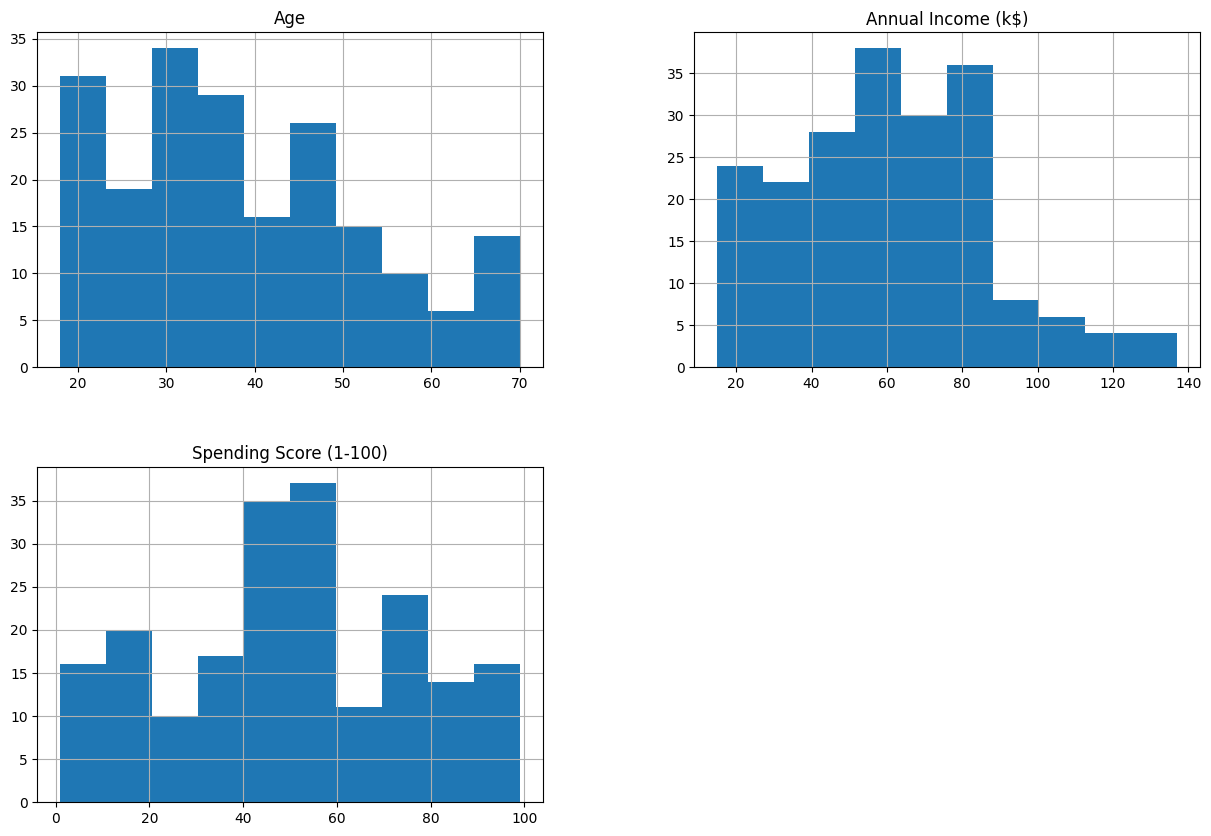

In [110]:
# Checking all features histplots for their distribution.
df.hist(figsize=(15,10))
plt.show()

**Observation:**

The histograms provide an initial view of the distribution of numerical features such as Age, Annual Income, and Spending Score. Each feature shows a distinct pattern, helping identify how values are spread before performing detailed univariate analysis.

## **Univariate Analysis:**

In [111]:
# Separating categorical and numerical column names into lists
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

cat_cols, num_cols

(['Genre'], ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

**Observation:**

Categorical and numerical column names are separated into lists for convenient analysis and preprocessing.

In [112]:
df['Genre']

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [113]:
# It gives count of each unique category.
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


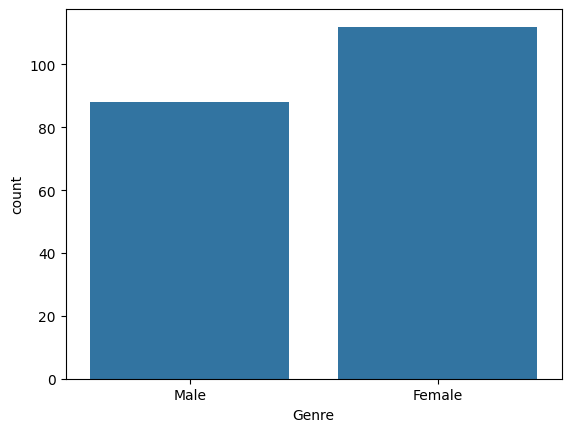

In [114]:
# Visualizing the groups of Genre
sns.countplot(x='Genre', data=df)
plt.show()

**Observation**:

The plot shows the frequency of each gender category in the dataset, with a slight difference between the two groups.

In [115]:
df['Age']

,Age
0,19
1,21
2,20
3,23
4,31
...,...
195,35
196,45
197,32
198,32


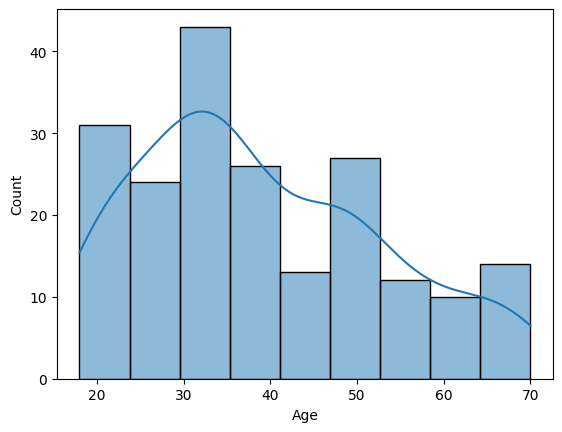

In [116]:
# Checking distribution plot for the Age.
sns.histplot(df['Age'], kde=True)
plt.show()

**Observation:**

The Age feature shows a clear distribution with most customers belonging to the young and middle-age groups. The KDE curve helps visualize the density across different age ranges.

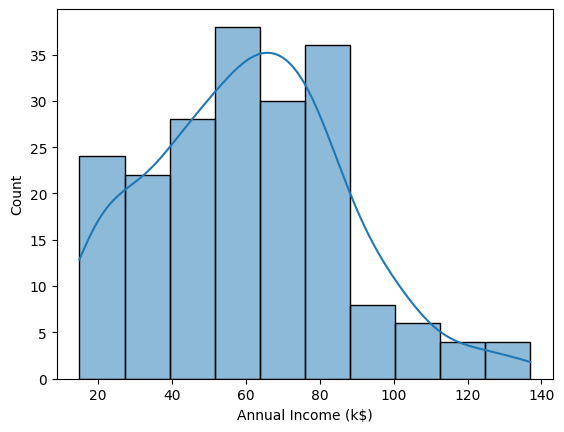

In [117]:
# Checking distribution plot for the Annual Income.
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.show()

**Observation:**

Most customers have annual incomes concentrated around the mid-range values, with a noticeable spread between lower and higher income groups.

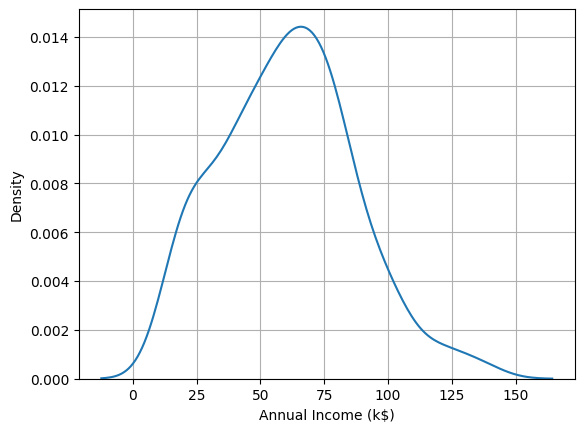

In [118]:
# KDE plot to understand the density distribution of Annual Income
sns.kdeplot(df['Annual Income (k$)'])
plt.grid()
plt.show()

**Observation:**

The KDE plot shows how annual income values are distributed across the customer base, highlighting the regions where income values are more concentrated.

In [119]:
df['Spending Score (1-100)']

,Spending Score (1-100)
0,39
1,81
2,6
3,77
4,40
...,...
195,79
196,28
197,74
198,18


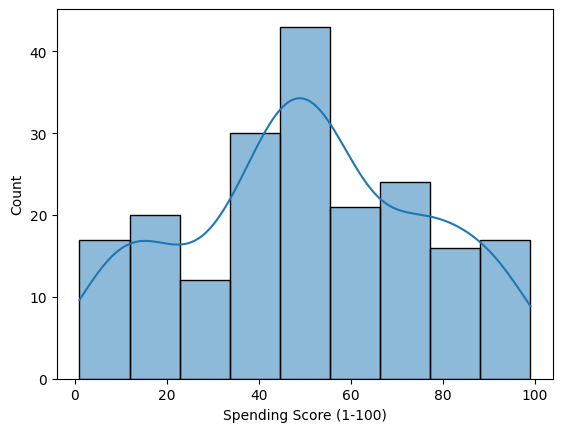

In [120]:
# Checking distribution plot for the Spending Score.
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.show()

**Observation:**

Most customers have Spending Scores clustered around the mid-range (40–60), with clear variation across the entire scale from low to high spenders.

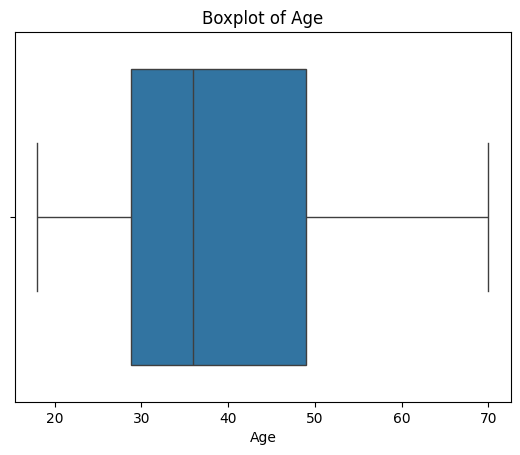

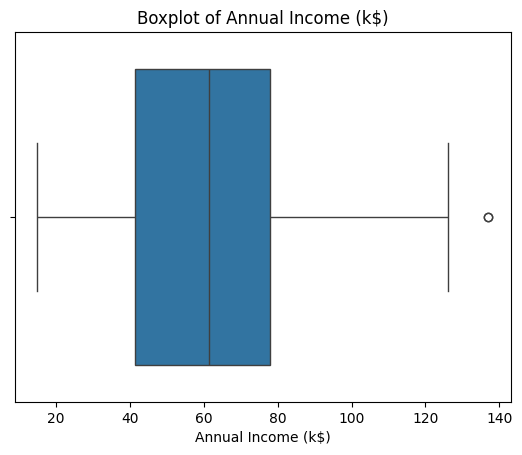

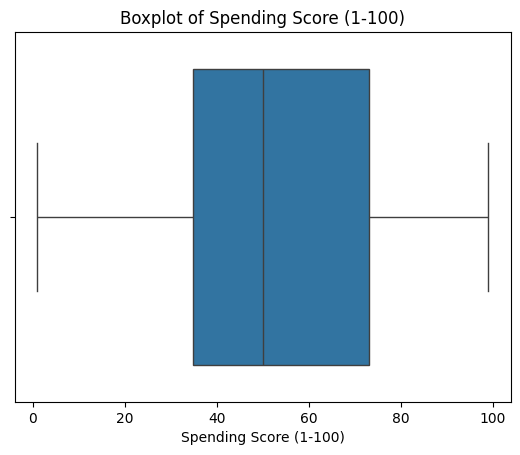

In [121]:
# Checking spread and outliers using boxplots for numerical features.
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Observation:**

The boxplots show the distribution and possible outliers in the numerical features. Overall, the numerical variables display reasonable spread, with no extreme outliers visible.

## **Bivariate Analysis:**

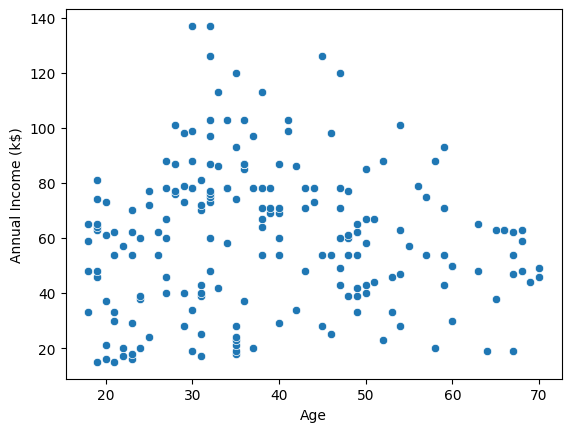

In [122]:
# Relationship between Age and Annual Income
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.show()

**Observation:**

There is no strong relationship between Age and Annual Income, as the points are spread broadly without a clear pattern.

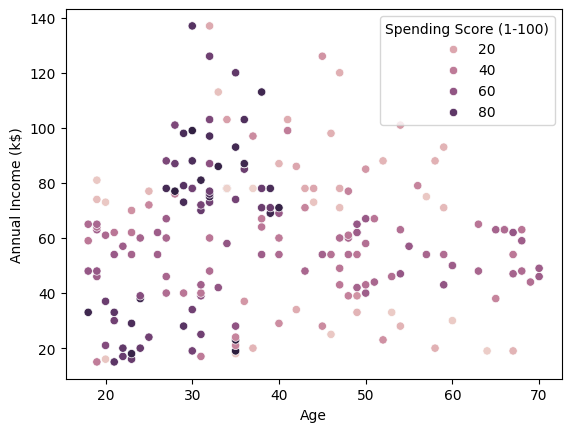

In [123]:
# Relationship between Age and Annual Income with Spending Score as hue
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)')
plt.show()

**Observation:**

Color variation shows how spending behavior differs across age and income groups. Some spending patterns cluster together, indicating potential natural groupings.

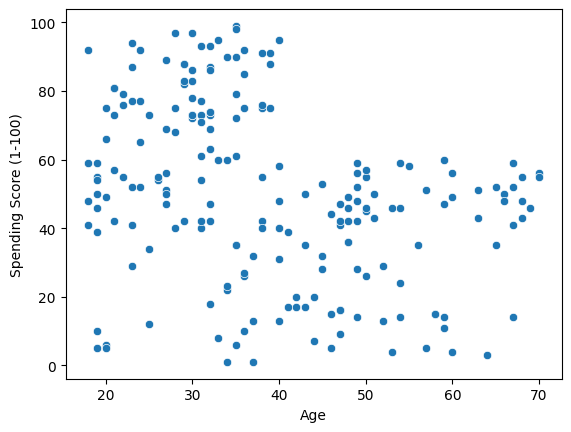

In [124]:
# Relationship between Age and Spending Score.
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')
plt.show()

**Observation:**

Spending behavior does not show a clear trend with Age; customers across ages spend variably.

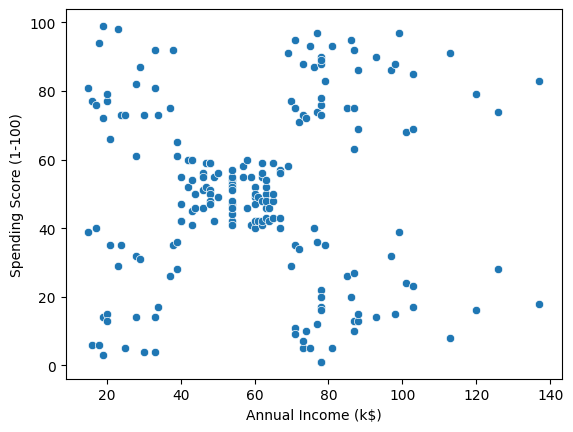

In [125]:
# Relationship between Annual Income and Spending Score.
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

**Observation:**

Spending Score shows clusters within different income groups, which is useful for clustering.

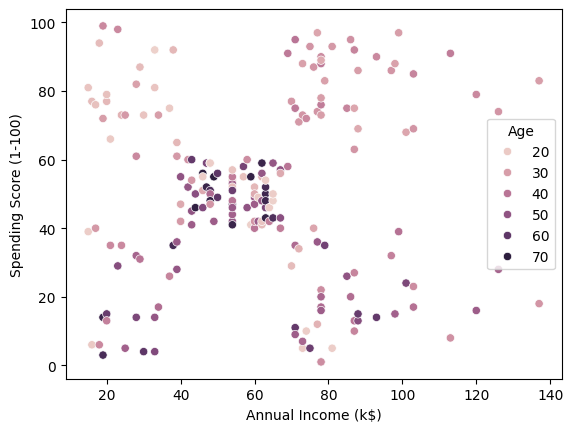

In [126]:
# Relationship between Annual Income and Spending Score with Age as hue
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age')
plt.show()

**Observation:**

Different age groups show different spending patterns even within similar income levels, which supports the idea of multiple customer segments.

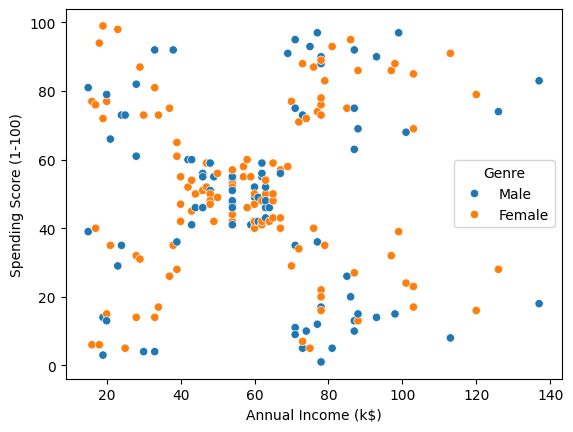

In [127]:
# Relationship between Annual Income and Spending Score with Gender as hue
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.show()

**Observation:**

The spending behavior varies slightly between genders, but the separation is not strong enough to influence clustering.

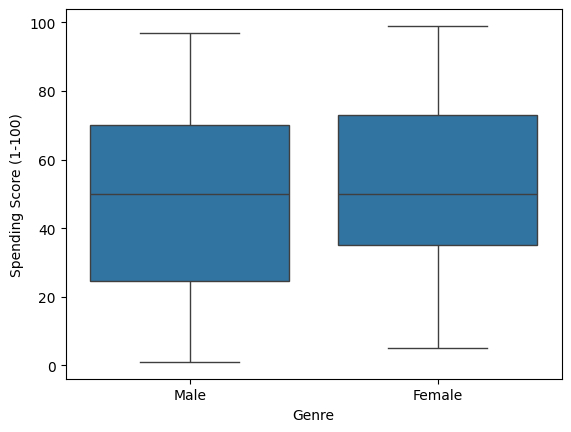

In [128]:
# Distribution of Spending Score across Gender categories
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.show()

**Observation:**

Spending behavior varies slightly between genders, but the difference is not strong enough to form separate clusters based only on gender.

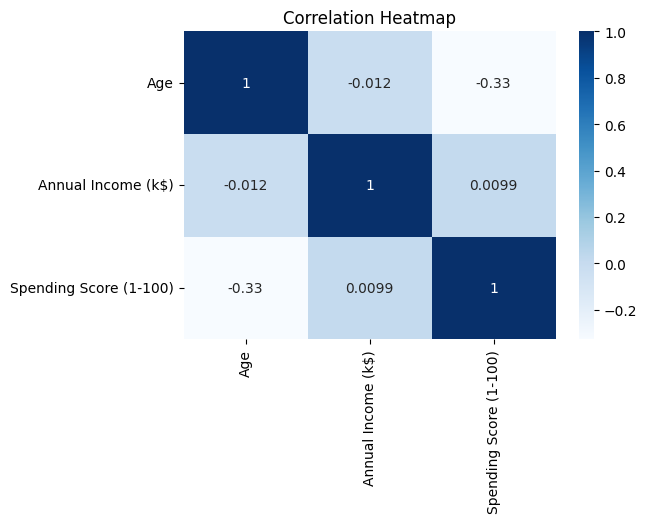

In [129]:
# Checking correlation between numerical features
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Observation:**

The heatmap shows moderate correlation between Annual Income and Spending Score, indicating a meaningful relationship that can influence cluster formation. Age has weaker correlations with the other features, suggesting it contributes differently to customer segmentation.

## **Multivariate Analysis:**

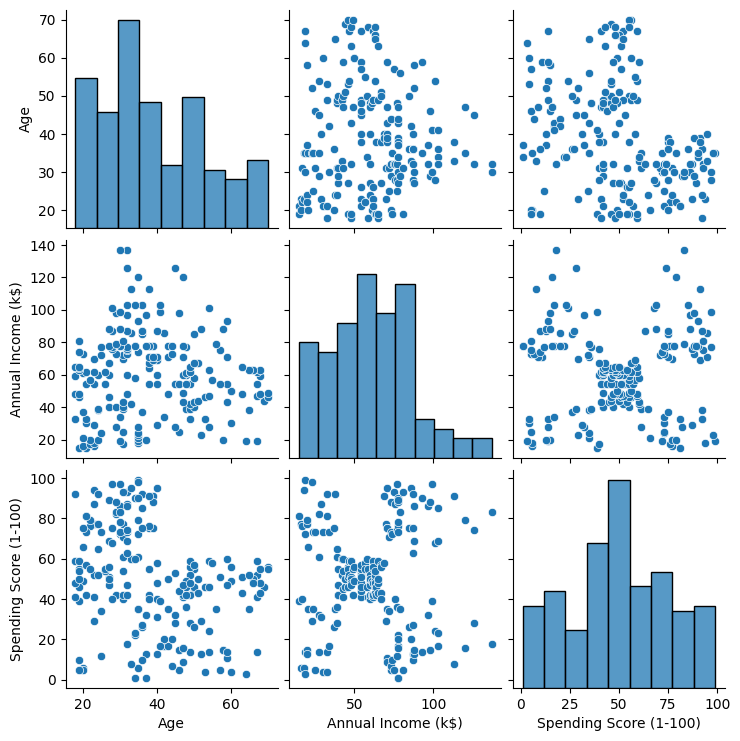

In [130]:
# Pairplot to observe relationships between multiple numerical features.
sns.pairplot(df[num_cols])
plt.show()

**Observation:**

The pairplot displays the relationships between age, annual income, and spending score. The plots show noticeable grouping patterns, suggesting the presence of natural clusters within the data.

## **Data Pre-processing:**

In [131]:
# Checking if there are any null values in the dataset.
df.isnull().sum()

,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**Observation:**

No missing values were found in the dataset, so no imputation is required. All features contain valid data, and the dataset is ready for further preprocessing steps such as encoding and scaling.

In [132]:
# Encoding Genre to numeric labels using map.
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [133]:
# Verify encoding.
print(df['Genre'].value_counts())
print(df['Genre'].dtype)

Genre
1    112
0     88
Name: count, dtype: int64
int64


**Observation:**

Genre was label-encoded into numeric values (Male → 0, Female → 1) using a simple mapping because the column contains only two categories. This preserves the original column name and prepares the data for numerical operations and modeling.

In [134]:
# Checking Dataset after encoding.
df.sample(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
17,0,20,21,66
188,1,41,103,17
167,1,33,86,95
164,0,50,85,26
29,1,23,29,87


In [135]:
# Selecting the two features used for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

**Observation:**

Only Annual Income and Spending Score are selected for clustering, as these two features show clear natural groupings and provide the strongest separation between customer segments.

In [136]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [137]:
# Scaling the selected features for clustering.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
# showing first 5 rows
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

**Observation:**

The selected features (Annual Income and Spending Score) have been standardized to ensure equal contribution during distance-based clustering.

## **Model Building:**

In [139]:
# Importing KMeans for clustering.
from sklearn.cluster import KMeans

**Elbow Method (Finding Optimal k):**

In [140]:
# Using the Elbow Method to find the optimal number of clusters.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

**Observation:**

init='k-means++' is used to select better initial centroids and improve clustering stability.

inertia_ represents the WCSS value, which decreases as the number of clusters increases and helps identify the elbow point.

In [143]:
for i, value in enumerate(wcss, start=1):
    print(i, "→", value)

1 → 399.99999999999994
2 → 273.66888662642003
3 → 157.70400815035939
4 → 109.22822707921345
5 → 65.56840815571681
6 → 60.132874871934206
7 → 49.668244837367965
8 → 37.31912287833882
9 → 32.495081199100916
10 → 30.05932269404222


**Plotting the Elbow Curve:**

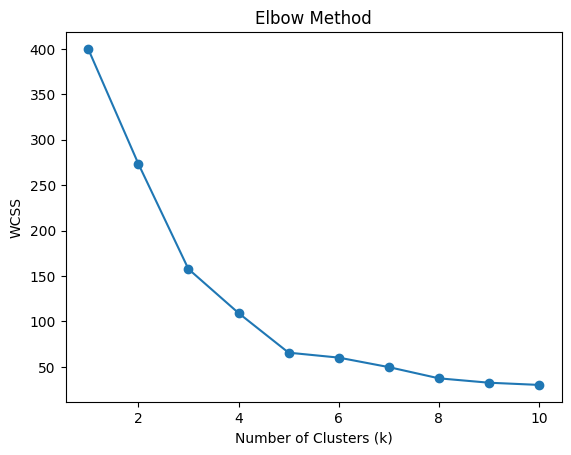

In [147]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

**Observation:**

The Elbow curve shows a clear bend at k = 5, after which the reduction in WCSS becomes minimal. This indicates that five clusters provide the best balance between compactness and interpretability. Therefore, k = 5 is selected as the optimal number of clusters for segmenting the customers.

## **Training Model:**

In [163]:
# Training K-Means with k = 5 on the scaled data.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [160]:
kmeans

KMeans(n_clusters=5, random_state=42)

In [165]:
# Assigning cluster labels to the original dataframe for analysis.
labels = kmeans.predict(X_scaled)
df['Cluster'] = labels

**Observation:**

Cluster labels have been assigned to each customer based on Annual Income and Spending Score.

In [171]:
df.sample(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
25,0,29,28,82,2
76,1,45,54,53,0
56,1,51,44,50,0
157,1,30,78,78,1
155,1,27,78,89,1


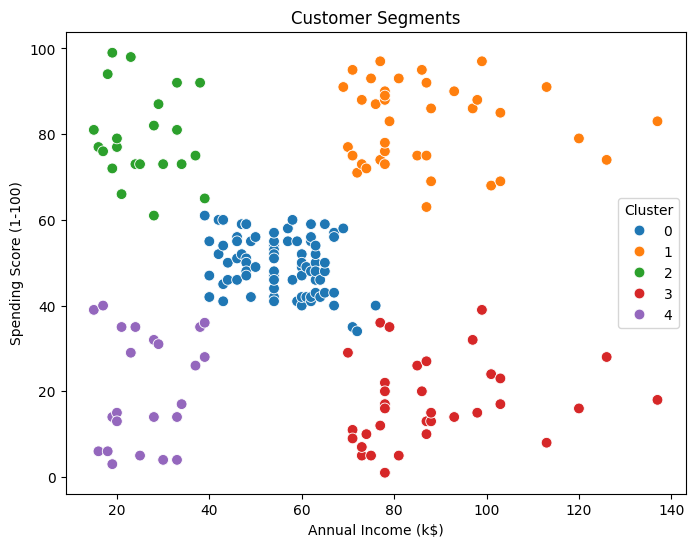

In [177]:
# Visualizing the clusters based on Annual Income and Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x ='Annual Income (k$)',y ='Spending Score (1-100)',hue=df['Cluster'],palette='tab10',s=60)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

**Observation:**

The scatter plot displays the five customer segments, showing clear separation between clusters based on income and spending behavior.

In [179]:
# Cluster-wise summary of Annual Income and Spending Score
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


**Cluster Interpretation:**

Cluster 0: Older customers with moderate income and average spending behavior.

Cluster 1: Young adults with high income and high spending — likely premium customers.

Cluster 2: Very young, low-income customers who spend heavily — potential impulsive buyers.

Cluster 3: Young customers with high income but low spending — budget-conscious group.

Cluster 4: Older customers with minimum income and low spending — potential group for upselling.

In [180]:
# Adding readable cluster names for interpretation
cluster_names = {
    0: 'Average Customers',
    1: 'Premium Customers',
    2: 'Impulsive Buyers',
    3: 'Budget Conscious Customers',
    4: 'Low-Value Customers'
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)
df[['Cluster', 'Cluster_Name']].head()

,Cluster,Cluster_Name
0,4,Low-Value Customers
1,2,Impulsive Buyers
2,4,Low-Value Customers
3,2,Impulsive Buyers
4,4,Low-Value Customers


In [181]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Name
0,0,19,15,39,4,Low-Value Customers
1,0,21,15,81,2,Impulsive Buyers
2,1,20,16,6,4,Low-Value Customers
3,1,23,16,77,2,Impulsive Buyers
4,1,31,17,40,4,Low-Value Customers


## **Performance Evaluation:**

In [186]:
# Evaluating the clustering performance using Silhouette Score.
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(sil_score)

0.5546571631111091


**Observation:**

The silhouette score reflects good clustering performance, showing that the groups are well-separated and customers within each cluster share similar behavior. This confirms that k = 5 forms meaningful and reliable customer segments.

## **Conclusion:**

The K-Means clustering model successfully grouped the customers into five meaningful segments based on Annual Income and Spending Score. The silhouette score of around 0.55 indicates good clustering performance, showing that the groups are well-formed and clearly separated. This segmentation helps in understanding different customer behaviors and supports targeted marketing and personalized business strategies.